UIDT de Thiès

UFR SES / Master 1 SDA

Magath NAEL

#Réponse question 1 :


In [1]:
#Nous importons le module pandas pour créer notre jeu de données
import pandas as pd
data=pd.read_csv("covid-senegal.csv",sep=';')

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/Colab Notebooks/Enonce-master/covid-senegal.csv'

In [ ]:
data

In [ ]:
data.info()

In [ ]:
data['date']=pd.to_datetime(data['date'])

In [ ]:
data.info()

In [2]:
print(data.describe(include='all'))

NameError: name 'data' is not defined

In [3]:
nan_value = float("NaN")

In [4]:
data.replace("", nan_value, inplace=True)

NameError: name 'data' is not defined

In [5]:
data

NameError: name 'data' is not defined

In [ ]:

data.dropna(subset = ["date"], inplace=True)
data.dropna(subset = ["tests"], inplace=True)



In [ ]:
data.describe()

,tests,cas,contact,importe,communautaire
count,495.000000,495.000000,495.000000,495.000000,495.000000
mean,1235.101010,97.430303,46.515152,1.230303,50.452525
std,600.291948,88.756243,39.816168,9.624293,60.151506
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,922.500000,30.000000,12.000000,0.000000,10.000000
50%,1215.000000,74.000000,36.000000,0.000000,26.000000
75%,1584.000000,131.000000,73.500000,1.000000,68.500000
max,3029.000000,529.000000,215.000000,209.000000,341.000000


#Réponse question 2 : 
Le taux de positivité journalier

In [ ]:
data["Proportion"] = data['cas']/data['tests']
data

,date,tests,cas,contact,importe,communautaire,Proportion
0,2020-02-03,1.0,1,0,0,0,1.000000
1,2020-03-03,2.0,1,0,1,0,0.500000
2,2020-04-03,2.0,2,1,1,0,1.000000
4,2020-06-03,2.0,0,0,0,0,0.000000
5,2020-07-03,2.0,0,0,0,0,0.000000
...,...,...,...,...,...,...,...
491,2021-07-07,2388.0,356,127,0,229,0.149079
492,2021-08-07,2166.0,354,135,1,218,0.163435
493,2021-09-07,2104.0,476,215,0,261,0.226236
494,2021-10-07,2762.0,380,136,0,234,0.137581


#Réponse question 3 :
Le cumul des cas 

In [ ]:
data["Total"]=data.cas.cumsum()
data

,date,tests,cas,contact,importe,communautaire,Proportion,Total
0,2020-02-03,1.0,1,0,0,0,1.000000,1
1,2020-03-03,2.0,1,0,1,0,0.500000,2
2,2020-04-03,2.0,2,1,1,0,1.000000,4
4,2020-06-03,2.0,0,0,0,0,0.000000,4
5,2020-07-03,2.0,0,0,0,0,0.000000,4
...,...,...,...,...,...,...,...,...
491,2021-07-07,2388.0,356,127,0,229,0.149079,46489
492,2021-08-07,2166.0,354,135,1,218,0.163435,46843
493,2021-09-07,2104.0,476,215,0,261,0.226236,47319
494,2021-10-07,2762.0,380,136,0,234,0.137581,47699


#Réponse question 4 et 5 :
- Représentation des tests et cas en fonction de la dates
- Représentation des tests et cas en fonction de la dates


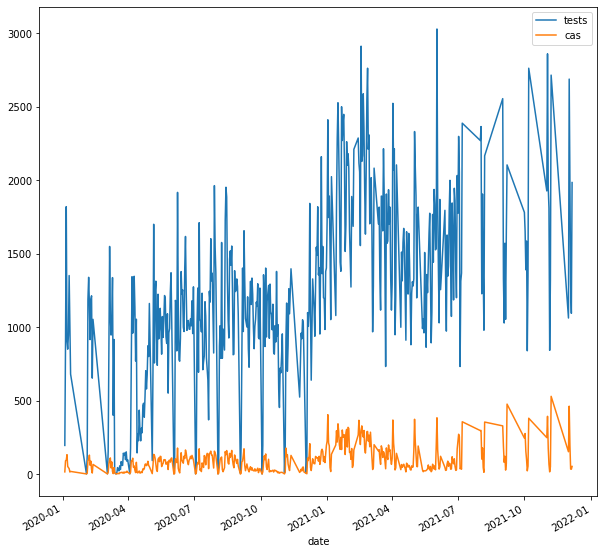

In [ ]:
#Diagramme en bâtons
import matplotlib.pyplot as plt
graph = data.plot(x='date',y=['tests','cas'],figsize=(10,10))

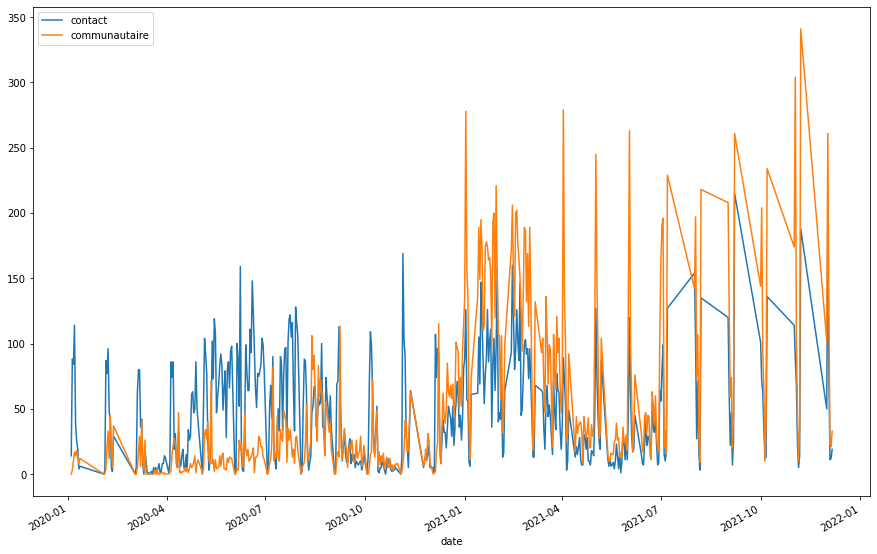

In [ ]:
graph = data.plot(x='date',y=['contact','communautaire'],figsize=(15,10))

#Réponse question 6 et 7 :
- Le box plot  
- le bar plot

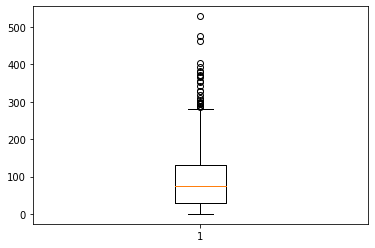

In [ ]:
graph = plt.boxplot(data["cas"])

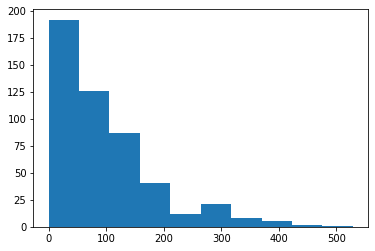

In [ ]:
graph = plt.hist(data["cas"])

D'après le box plot  et l'histograme on des valeurs aberrantes qui tournent autour de la valeur 500

#Réponse à la question 7
Discrétiser les données et les répartir en 4 classes

In [ ]:
data["cas_classe"] = pd.qcut(data["cas"],4,labels=["Classe 1","Classe 2","Classe 3", "Classe 4"])
data

,date,tests,cas,contact,importe,communautaire,Proportion,Total,cas_classe
0,2020-02-03,1.0,1,0,0,0,1.000000,1,Classe 1
1,2020-03-03,2.0,1,0,1,0,0.500000,2,Classe 1
2,2020-04-03,2.0,2,1,1,0,1.000000,4,Classe 1
4,2020-06-03,2.0,0,0,0,0,0.000000,4,Classe 1
5,2020-07-03,2.0,0,0,0,0,0.000000,4,Classe 1
...,...,...,...,...,...,...,...,...,...
491,2021-07-07,2388.0,356,127,0,229,0.149079,46489,Classe 4
492,2021-08-07,2166.0,354,135,1,218,0.163435,46843,Classe 4
493,2021-09-07,2104.0,476,215,0,261,0.226236,47319,Classe 4
494,2021-10-07,2762.0,380,136,0,234,0.137581,47699,Classe 4


#Réponse question 8
La fréquence des variables cas_classe

In [ ]:
data["cas_classe"].value_counts()


Classe 1    126
Classe 4    124
Classe 2    124
Classe 3    121
Name: cas_classe, dtype: int64

#Réponse question 9
On égalise la moyenne et l'espérance 

In [ ]:
moyenne = data['cas'].mean()
moyenne

97.43030303030304

In [ ]:
variance = data["cas"].var()
variance

7877.6707397865275

In [ ]:
estimateur_p_chapeau = moyenne/variance
estimateur_p_chapeau

0.012367907500655867

In [ ]:
estimateur_teta_chapeau = estimateur_p_chapeau*moyenne/(1-estimateur_p_chapeau)
estimateur_teta_chapeau

1.2200990478045437